In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv("../Data/Hitters.csv")
df = data.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [3]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [4]:
X_ = df.drop(["Salary","League","Division","NewLeague"],axis = 1).astype("float64")

In [5]:
y = df["Salary"]

In [6]:
X_.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [7]:
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [10]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [11]:
cart_model = DecisionTreeRegressor(min_samples_split = 2)

In [12]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

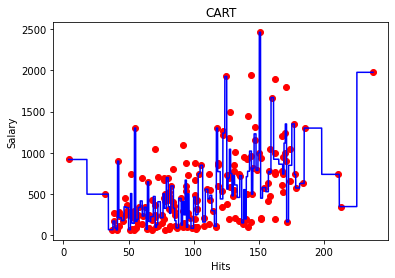

In [13]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')
plt.title('CART')
plt.xlabel('Hits')
plt.ylabel('Salary') ;

In [14]:
from skompiler import skompile

In [17]:
print(skompile(cart_model.predict).to('python/code'))


((920.0 if x[0] <= 18.0 else ((500.0 if x[0] <= 34.5 else (70.0 if x[0] <= 
    38.0 else 175.0) if x[0] <= 39.5 else 90.0 if x[0] <= 40.5 else 67.5) if
    x[0] <= 41.5 else 900.0 if x[0] <= 42.5 else (((((215.55566666666664 if
    x[0] <= 44.5 else 180.0) if x[0] <= 46.5 else 347.5 if x[0] <= 48.0 else
    337.5) if x[0] <= 50.0 else 70.0) if x[0] <= 51.5 else 507.5) if x[0] <=
    52.5 else 150.0 if x[0] <= 53.5 else 146.83333333333334) if x[0] <= 
    54.5 else 1300.0 if x[0] <= 55.5 else (170.0 if x[0] <= 56.5 else 
    193.75) if x[0] <= 57.5 else ((((((340.0 if x[0] <= 59.0 else 418.5) if
    x[0] <= 60.5 else 235.0 if x[0] <= 62.0 else 341.667) if x[0] <= 63.5 else
    75.0) if x[0] <= 64.5 else 650.0) if x[0] <= 65.5 else 170.0 if x[0] <=
    67.0 else 228.66666666666666) if x[0] <= 69.0 else 472.5) if x[0] <= 
    70.5 else (100.0 if x[0] <= 71.5 else 130.0) if x[0] <= 72.5 else 
    409.1665 if x[0] <= 74.5 else 215.0) if x[0] <= 76.5 else (((505.0 if x
    [0] <= 77.5 else 

In [18]:
y_pred =cart_model.predict(X_test)

In [19]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [20]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [21]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [22]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [23]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [24]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [26]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 76)

In [27]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=76)

In [28]:
y_pred = cart_tuned.predict(X_test)

In [29]:
np.sqrt(mean_squared_error(y_test, y_pred))

423.406689243066